# Problem:
#### Given any integer number, write a function to find the shortest path to 1. At each step, you can do the following:
* If the input is divisible by three, you can divide it by three
* If the input is divisible by two, you can divide it by two
* You can add one

### The Naive Approach
#### Key notes:
* Nested arrays in the buffer so that each sub-array will correspond to a step / level of depth in the decision tree
* Sliding window with an incrementing counter to traverse the sub-arrays and generate options
* Cache array to capture all options at each step before updating the buffer and wiping the cache


In [1]:
class GetToOneNaive:
    def __init__(self, number):
        self.number = number
        self.buffer = [[number]]
    
    counter = 0    
    nodes = 0
    
    def parseTree(self):
        cache = []     
        while True:
            window = self.buffer[self.counter]
            # print(self.buffer)
            for i in window:
                if i %3 == 0:
                    cache.append(int(i / 3))
                if i %2 == 0:
                    cache.append(int(i / 2))
                cache.append(i + 1)
                
            self.buffer.append(cache)
                    
            if 1 in self.buffer[self.counter]:
                self.countNodes()
                return self.counter, self.nodes
                
            self.counter+=1
            cache=[]
            
    def countNodes(self):
        self.nodes = sum([1 for i in self.buffer for i in i])
        # print('{} nodes created to find solution'.format(sum([1 for i in self.buffer for i in i])))
        # print('{} steps needed to reach one from {}'.format(self.counter, self.number))

In [2]:
naive = GetToOneNaive(107)
naive.parseTree()
print('Steps: {} Nodes: {}'.format(naive.counter, naive.nodes))


Steps: 6 Nodes: 189


### Minor pruning:
#### Deduplicating the buffer sub-arrays
Passing two equal numbers, 5 and 5 for example, will result in two identical branches. To optimize and reduce the amount of nodes created to solve this problem, we can eliminate duplicates in the caching layer. By making the cache a set rather than an array, we ensure that no duplicates are passed to the buffer or being parsed in the next cycle.

In [3]:
class GetToOnePruned:
    def __init__(self, number):
        self.number = number
        self.buffer = [[number]]
    
    counter = 0
    nodes = 0
    def parseTree(self):
        cache = set()     
        while True:
            window = self.buffer[self.counter]
            for i in window:
                if i %3 == 0:
                    cache.add(int(i / 3))
                if i %2 == 0:
                    cache.add(int(i / 2))
                cache.add(i + 1)
                
            self.buffer.append(cache)
                    
            if 1 in self.buffer[self.counter]:
                self.countNodes()
                return self.counter, self.nodes
                
            self.counter+=1
            cache=set()
            
    def countNodes(self):
        self.nodes = sum([1 for i in self.buffer for i in i])
        # print('{} nodes created to find solution'.format(sum([1 for i in self.buffer for i in i])))
        # print('{} steps needed to reach one from {}'.format(self.counter, self.number))

In [4]:
pruned = GetToOnePruned(107)
pruned.parseTree()
print('Steps: {} Nodes: {}'.format(pruned.counter, pruned.nodes))


Steps: 6 Nodes: 89


### Extra pruning:
#### remove values that have already occurred
A number that has previously occurred will not generate a novel tree path in subsequent iterations. Therefore, if we test to see that our cache inputs have not yet occurred, we can further reduce the number of nodes necessary to reach 1.

In [5]:
class GetToOneOptimized:
    def __init__(self, number):
        self.number = number
        self.buffer = [[number]]
        self.allNodes = set()
    
    counter = 0
    nodes = 0
    def parseTree(self):
        cache = set()     
        while True:
            window = self.buffer[self.counter]
            for i in window:
                if i %3 == 0 & int(i/3) not in self.allNodes:
                    cache.add(int(i / 3))
                    self.allNodes.add(int(i / 3))
                    
                if i %2 == 0 & int(i/2) not in self.allNodes:
                    cache.add(int(i / 2))
                    self.allNodes.add(int(i / 2))
                    
                if i + 1 not in self.allNodes:    
                    cache.add(i + 1)
                    self.allNodes.add(i + 1)
                
            self.buffer.append(cache)
                    
            if 1 in self.buffer[self.counter]:
                self.countNodes()
                return self.counter, self.nodes
                
            self.counter+=1
            cache=set()
            
    def countNodes(self):
        self.nodes = sum([1 for i in self.buffer for i in i])
        # print('{} nodes created to find solution'.format(sum([1 for i in self.buffer for i in i])))
        # print('{} steps needed to reach one from {}'.format(self.counter, self.number))

In [6]:
optimized = GetToOneOptimized(107)
optimized.parseTree()
print('Steps: {} Nodes: {}'.format(optimized.counter, optimized.nodes))

Steps: 6 Nodes: 65


In [16]:
test_cases = [1, 18, 56, 84, 92 ,192, 208, 211, 250, 295, 307, 355, 567]
naive_nodes = []
pruned_nodes = []
optimized_nodes = []

for i in range(len(test_cases)):
    naive_case = GetToOneNaive(test_cases[i]).parseTree()[1]
    naive_nodes.append(naive_case)
    
    pruned_case = GetToOnePruned(test_cases[i]).parseTree()[1]
    pruned_nodes.append(pruned_case)
        
    optimized_case = GetToOneOptimized(test_cases[i]).parseTree()[1]
    optimized_nodes.append(optimized_case)

print(naive_nodes)
print(pruned_nodes)
print(optimized_nodes)
    
    

[2, 38, 252, 400, 301, 504, 319, 413, 956, 492, 483, 1139, 657]
[2, 27, 111, 138, 126, 177, 152, 154, 243, 216, 199, 279, 248]
[2, 22, 70, 88, 85, 112, 96, 107, 141, 136, 127, 164, 165]


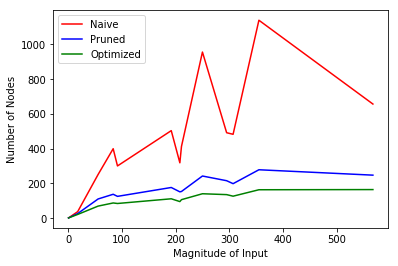

In [27]:
import numpy as np
import matplotlib.pyplot as plt

x1 = test_cases
y1 = naive_nodes
x2 = test_cases
y2 = pruned_nodes
x3 = test_cases
y3 = optimized_nodes

# plt.plot([test_cases], [naive_nodes], 'go-', label='line 1', linewidth=2, alpha=0.4, color="orange")
# plt.plot([test_cases], [pruned_nodes], 'go-', label='line 2', alpha=0.3, color="blue")
# plt.plot([test_cases], [optimized_nodes], 'go-', label='line 3', alpha=0.5, color="green")

plt.plot(x1, y1, antialiased=True, color='red', label='Naive')
plt.plot(x2, y2, antialiased=True, color='blue', label='Pruned')
plt.plot(x3, y3, antialiased=True, color='green', label='Optimized')


plt.ylabel('Number of Nodes')
plt.xlabel('Magnitude of Input')
plt.legend()
plt.show()

In [28]:
naive_pruned_ratio = []
naive_optimized_ratio = []
pruned_optimized_ratio = []

for i in range(len(pruned_nodes)):
    if naive_nodes[i] - pruned_nodes[i] != 0:
        change = (naive_nodes[i]-pruned_nodes[i])/naive_nodes[i]
        naive_pruned_ratio.append(change)
    if pruned_nodes[i] - optimized_nodes[i] != 0:
        change = (pruned_nodes[i]-optimized_nodes[i])/pruned_nodes[i]
        pruned_optimized_ratio.append(change)
    if naive_nodes[i] - optimized_nodes[i] != 0:
        change = (naive_nodes[i]-optimized_nodes[i])/naive_nodes[i]
        naive_optimized_ratio.append(change)
    else:
        pass

n_p_ratio_avg = sum(naive_pruned_ratio)/len(naive_pruned_ratio)
n_o_ratio_avg = sum(naive_optimized_ratio)/len(naive_optimized_ratio)
p_o_ratio_avg = sum(pruned_optimized_ratio)/len(pruned_optimized_ratio)

print('{0:0.0%} less nodes on average with pruning compared to naive.'.format(n_p_ratio_avg))
print('{0:0.0%} less nodes on average with optimization compared to naive.'.format(n_o_ratio_avg))
print('{0:0.0%} less nodes on average with optimization compared to pruning.'.format(p_o_ratio_avg))

60% less nodes on average with pruning compared to naive.
73% less nodes on average with optimization compared to naive.
35% less nodes on average with optimization compared to pruning.


In [11]:
# Noodling with nested array comprehensions
nestedArrays = [[1,4,1,9],[1,33,1],[100]]

print([i for i in nestedArrays for i in i])
print([1 for i in nestedArrays for i in i])
print(sum([i for i in nestedArrays for i in i]))

[1, 4, 1, 9, 1, 33, 1, 100]
[1, 1, 1, 1, 1, 1, 1, 1]
150
